Aprendizaje usando minibatch
===

* Ultima modificación: Marzo 10, 2021

## Aprendizaje batch o aprendizaje por lotes

Es el que se ha usado en los casos anteriores. Se minimiza el error computado sobre la muestra de datos.

$$\begin{split} 
\text{SSE} & = \sum_i (d_i - y_i)^2 \\
 & = \sum_i (d_i - w_0 - w_1 x_i)^2 
\end{split}$$

Note que en este caso, el gradiente de la función SSE() es la suma del gradiente del error para cada punto (ejemplo) del conjunto de datos:

$$\begin{split}
\frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1}) 
  & = \frac{\partial}{\partial \mathbf{w}} \sum_i (d_i - y_{i, k-1})^2 \\ 
  & = \sum_i \frac{\partial}{\partial \mathbf{w}}  (d_i - y_{i, k-1})^2 \\
  & = \sum_i \frac{\partial}{\partial \mathbf{w}} (d_i - w_0 - w_1 x_i)^2 \\
  & = \sum_i \frac{\partial}{\partial \mathbf{w}} e_i^2 \\
  & = \sum_i 2 e_i \frac{\partial}{\partial \mathbf{w}} e_i 
\end{split}
$$

Es decir, se calcula el gradiente neto (la sumatoria sobre todos los puntos) y luego se corrigen los pesos. Si tiene dudas o no comprende completamente el procedimiento, repase el material de las secciones anteriores.

Se llama aprendizaje batch o aprendizaje por lotes porque se presentan todos los datos en un solo lote antes de realizar la correción de los pesos.

A continuación se reproduce el código de las secciones anteriores para efectos comparativos.


Valores encontrados

  w0 = 0.675531
  w1 = 1.643269




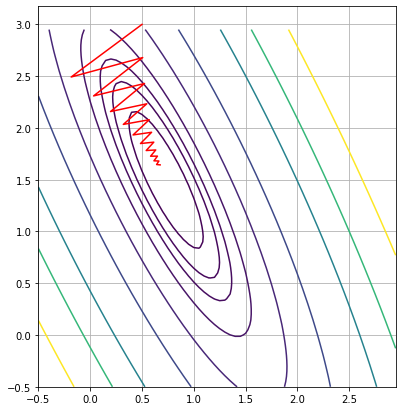

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

x = [
    0.1087,
    0.2698,
    0.3765,
    0.2146,
    0.9155,
    0.0246,
    0.0221,
    0.8632,
    0.6460,
    0.2092,
    0.8567,
    0.1591,
    0.9647,
    0.6231,
    0.7460,
    0.3654,
    0.3065,
    0.6886,
    0.4966,
    0.2008,
    0.2618,
    0.7607,
    0.1563,
    0.4424,
    0.7731,
]

d = [
    0.9519,
    1.1237,
    1.2360,
    1.0526,
    2.0743,
    0.7906,
    0.7603,
    2.0533,
    1.6887,
    1.0563,
    2.0991,
    0.8953,
    2.1917,
    1.6266,
    1.8508,
    1.2828,
    1.2283,
    1.8722,
    1.4657,
    1.0418,
    1.1097,
    1.7826,
    0.9711,
    1.4267,
    1.8248,
]


def SSE(w0, w1):
    return sum([(v - w0 - w1 * u) ** 2 for u, v in zip(x, d)])


W0 = np.arange(-0.5, 3.0, 0.05)
W1 = np.arange(-0.5, 3.0, 0.05)
W0, W1 = np.meshgrid(W0, W1)
F = SSE(W0, W1)


def plot_contour():
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect("equal", "box")
    ax.contour(W0, W1, F, levels=[0, 1, 2, 3, 5, 10, 20, 40, 60, 90])
    ax.grid()


def gSSE(w0, w1):
    e = [(v - w0 - w1 * u) for u, v in zip(x, d)]
    gw0 = -2 * sum(e)
    gw1 = -2 * sum([q * v for q, v in zip(e, x)])
    return (gw0, gw1)


def mejora(w0, w1, mu):
    gw0, gw1 = gSSE(w0, w1)
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1
    return (w0, w1)


# Punto de inicio
w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f = [SSE(w0, w1)]

for epoch in range(20):
    w0, w1 = mejora(w0, w1, 0.03)
    history_w0.append(w0)
    history_w1.append(w1)
    history_f.append(SSE(w0, w1))

print("\nValores encontrados\n\n  w0 = {:f}\n  w1 = {:f}\n\n".format(w0, w1))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
plt.show()

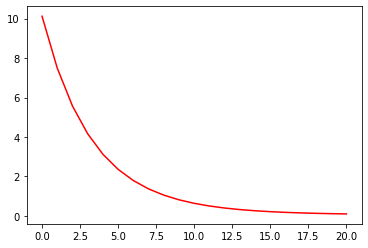

In [9]:
plt.plot(history_f, color="red")
plt.show()

## Aprendizaje Online (en línea)

Note que en el aprendizaje por lotes, la función a mnimizar es la suma de errores instantaneos al cuadrado:

$$\text{SSE}(\mathbf{w}_{k-1}) = \sum_i e_i^2$$

tal que la derivada del error es:

$$\begin{split}
\frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1}) 
  & = \sum_i \frac{\partial}{\partial \mathbf{w}} e_i^2 \\
  & = \sum_i 2 e_i \frac{\partial}{\partial \mathbf{w}} e_i 
\end{split}
$$

En el aprendizaje en línea se desea minimizar el cuadrado del error instantaneo $e_i$, o:

$$e_{i,k}(w_{0,i,k}, w_{1,i,k}) = d_i - w_{0,i,k-1} - w_{1,i,k-1}$$

que es una función dependiente de los parámetros $\mathbf{w}$. De esta forma, la correción de los parámetros se realizar por cada patrón o ejemplo $i$:

$$
\mathbf{w}_{i,k} 
  = \mathbf{w}_{i,k-1} - \mu \frac{\partial}{\partial \mathbf{w}} e_{i,k-1}^2(\mathbf{w}_{i, k-1})
$$

En este algoritmo, los patrones o ejemplos de datos usualmente son recorridos secuencialmente (en orden).


Valores encontrados

  w0 = 0.654250
  w1 = 1.642800




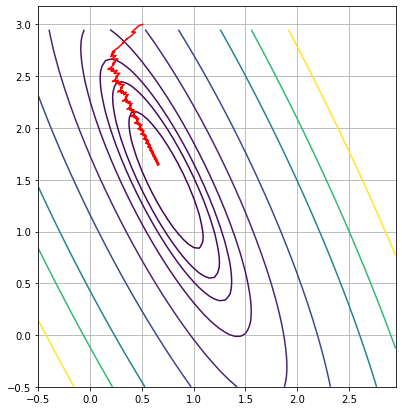

In [4]:
def gOnline(u, v, w0, w1):
    e = v - w0 - w1 * u  # se calcula el error instantaneo para el punto (u, v)
    gw0 = -2 * e  # gradiente de w0
    gw1 = -2 * e * u  # gradiente de w1
    return (gw0, gw1)


def mejora(u, v, w0, w1, mu):
    gw0, gw1 = gOnline(
        u, v, w0, w1
    )  # computa el gradiente para los parámetros actuales
    w0 = w0 - mu * gw0  # realiza la corrección de los parámetros
    w1 = w1 - mu * gw1  #
    return (w0, w1)  # retorna los parámetros corregidos


#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = []
history_w1 = []
history_f = []

for epoch in range(20):
    for u, v in zip(x, d):  #  se itera sobre los puntos del dataset
        w0, w1 = mejora(u, v, w0, w1, 0.03)
        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append((v - w0 - w1 * u) ** 2)

print("\nValores encontrados\n\n  w0 = {:f}\n  w1 = {:f}\n\n".format(w0, w1))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
plt.show()

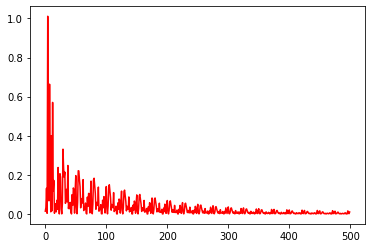

In [5]:
plt.plot(history_f, color="red")
plt.show()

## Gradiente descendente estocástico (SDG)

El algoritmo de gradiente descendente estocástico (SDG) es un algoritmo de aprendizaje online, en que el conjunto de patrones o ejemplos es mezclado aleatoriamente para que los datos nunca se tomen de forma cíclica durante el proceso de optimización.


Valores encontrados

  w0 = 0.657837
  w1 = 1.661835


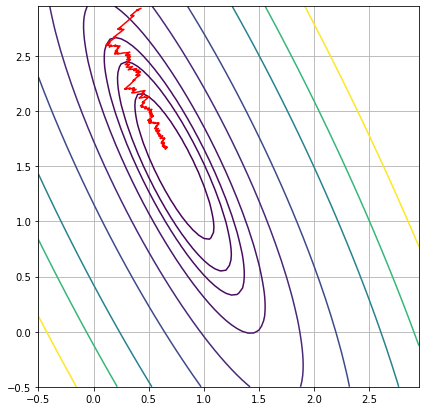

In [6]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = []
history_w1 = []
history_f = []

for epoch in range(20):
    for n in np.random.choice(len(d), len(d)):
        w0, w1 = mejora(x[n], d[n], w0, w1, 0.03)
        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append((v - w0 - w1 * u) ** 2)

print("\nValores encontrados\n\n  w0 = {:f}\n  w1 = {:f}".format(w0, w1))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
;

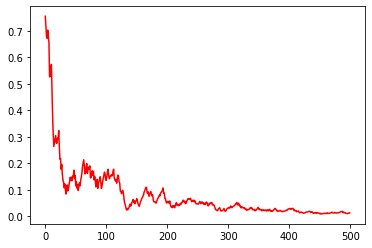

In [7]:
plt.plot(history_f, color="red")
;

## Minibatch

Para conjuntos de datos muy grandes el aprendizaje batch es muy costoso computacionalmnete ya que deben recorrerse todos los datos, mientras que el aprendizaje online es muy lento en converger (compare los gráficos de los ejemplos anteriores). Es en este caso, donde se toma un punto intermedio: 

* El conjunto de datos se divide en varios subconjuntos.


* Se selecciona aleatoriamente un subconjunto y se computa el gradiente neto (tal como en el caso del aprendizaje batch).


* Se realiza la corrección de los parámetros del modelo y se selecciona otro subconjunto que no haya sido seleccionado antes (tal como en el caso del SDG).